#Домашнее задание "Продвинутая оптимизация".
##Задание
При фиксированном seed=42 поэкспериментируйте с параметрами алгоритма [differential_evolution](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.differential_evolution.html): strategy, popsize, mutation.

Постройте графики количества итераций (nit) оптимизации функции [ackley](https://en.wikipedia.org/wiki/Ackley_function) от значения параметра.

Подробнее о результате выдачи [тут](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.OptimizeResult.html).

In [ ]:
import numpy as np
from scipy.optimize import differential_evolution
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [ ]:
def ackley(x):
    arg1 = -0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2))
    arg2 = 0.5 * (np.cos(2. * np.pi * x[0]) + np.cos(2. * np.pi * x[1]))
    return -20. * np.exp(arg1) - np.exp(arg2) + 20. + np.e

bounds = [(-10, 10), (-10, 10)]

result = differential_evolution(ackley, bounds,strategy='randtobest1exp',popsize=15,mutation=(0.5, 1), seed=42)
result

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 4773
     nit: 156
 success: True
       x: array([0., 0.])

In [ ]:
params_strategy = ['best1bin','best1exp','rand1exp','randtobest1exp','currenttobest1exp','best2exp',
         'rand2exp','randtobest1bin','currenttobest1bin','best2bin','rand2bin','rand1bin']

In [ ]:
df = pd.DataFrame()

In [ ]:
for param in params_strategy:
  res = (differential_evolution(ackley, bounds,strategy=param,popsize=15, mutation=(0.5, 1), seed=42)).nit
  row = {'strategy': param, 'count(nit)': res}
  df = pd.concat([df, pd.DataFrame([row])])

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 <a list of 12 Text major ticklabel objects>)

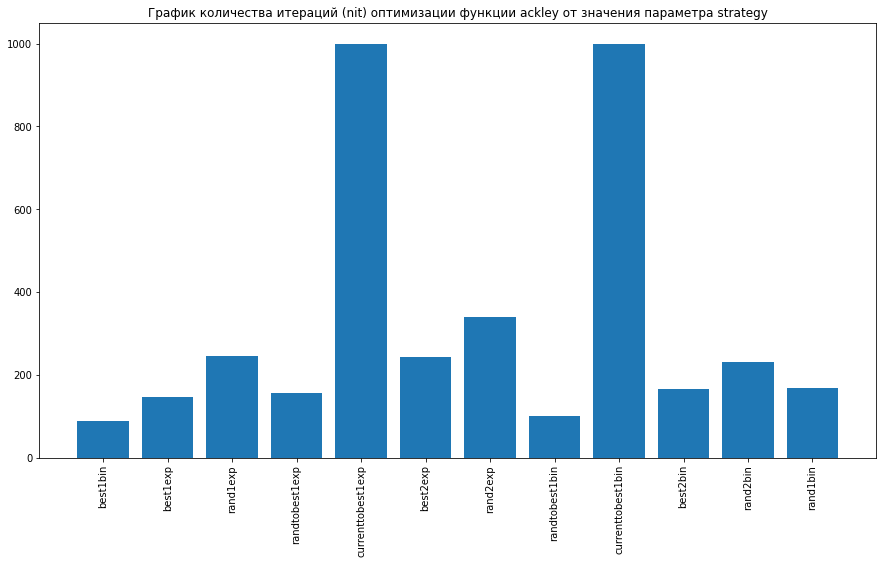

In [ ]:
plt.figure(figsize = (15,8))
plt.bar(df['strategy'], df['count(nit)'])
plt.title('График количества итераций (nit) оптимизации функции ackley от значения параметра strategy')
plt.xticks(rotation=90)

##Дополнительное задание
Поэкспериментируйте с параметрами и оптимизацией через [minimize](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html):

In [ ]:
from scipy.optimize import minimize

x0 = [0,0]

result_m = minimize(ackley, x0,  method='Nelder-Mead')
result_m

 final_simplex: (array([[ 0.00000000e+00,  0.00000000e+00],
       [-1.60675049e-05, -8.45336914e-06],
       [-1.40380859e-06, -3.11279297e-05]]), array([4.44089210e-16, 5.13604405e-05, 8.81584216e-05]))
           fun: 4.440892098500626e-16
       message: 'Optimization terminated successfully.'
          nfev: 17
           nit: 8
        status: 0
       success: True
             x: array([0., 0.])

In [ ]:
result_Powell = minimize(ackley, x0,  method='Powell')
result_Powell

   direc: array([[1., 0.],
       [0., 1.]])
     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 63
     nit: 1
  status: 0
 success: True
       x: array([0., 0.])

In [ ]:
result_CG = minimize(ackley, x0,  method='CG')
result_CG

     fun: 4.440892098500626e-16
     jac: array([2.82842755, 2.82842755])
 message: 'Desired error not necessarily achieved due to precision loss.'
    nfev: 165
     nit: 0
    njev: 51
  status: 2
 success: False
       x: array([0., 0.])

In [ ]:
result_BFGS = minimize(ackley, x0,  method='BFGS')
result_BFGS

      fun: 4.440892098500626e-16
 hess_inv: array([[1, 0],
       [0, 1]])
      jac: array([2.82842755, 2.82842755])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 165
      nit: 0
     njev: 51
   status: 2
  success: False
        x: array([0., 0.])

In [ ]:
result_TNC = minimize(ackley, x0,  method='TNC')
result_TNC

     fun: 4.440892098500626e-16
     jac: array([2.82842727, 2.82842727])
 message: 'Linear search failed'
    nfev: 18
     nit: 0
  status: 4
 success: False
       x: array([0., 0.])